## How well do jobs and skills pay for Data Analysts?
#### Methology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
# import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\soods\anaconda3\envs\python_project_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
df_us = df[df['job_country'] == "United States"].dropna(subset='salary_year_avg').copy() # ------------> dataframe contaning only us records
df_us

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
92,Data Engineer,Remote - Data Engineer - Permanent - W2,Anywhere,via LinkedIn,Full-time,True,"Illinois, United States",2023-02-21 13:29:59,False,True,United States,year,120000.0,NaN,Apex Systems,"[sql, python]","{'programming': ['sql', 'python']}"
100,Data Scientist,"Data Scientist, Risk Data Mining - USDS","Mountain View, CA",via LinkedIn,Full-time,False,"California, United States",2023-07-31 13:01:18,False,True,United States,year,228222.0,NaN,TikTok,"[sql, r, python, express]","{'programming': ['sql', 'r', 'python'], 'webfr..."
109,Data Analyst,Senior Supply Chain Analytics Analyst,Anywhere,via Get.It,Full-time,True,"Illinois, United States",2023-10-12 13:02:19,False,True,United States,year,89000.0,NaN,Get It Recruit - Transportation,"[python, r, alteryx, tableau]","{'analyst_tools': ['alteryx', 'tableau'], 'pro..."
116,Data Scientist,Data Scientist,Anywhere,via LinkedIn,Full-time,True,"Texas, United States",2023-10-04 13:04:23,False,False,United States,year,114000.0,NaN,4 Corner Resources,"[r, python, sql, t-sql, hadoop, spark, tableau]","{'analyst_tools': ['tableau'], 'libraries': ['..."
146,Data Engineer,Data Engineer Graduate (Real Time Communicatio...,"Seattle, WA",via LinkedIn,Full-time,False,"California, United States",2023-10-21 13:06:16,False,True,United States,year,129500.0,NaN,ByteDance,"[golang, scala, python, java, hadoop, spark]","{'libraries': ['hadoop', 'spark'], 'programmin..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785563,Data Scientist,Data Scientist I/II (Model Risk Management & M...,"Pensacola, FL",via Navy Federal Credit Union - Talentify,Full-time,False,"Florida, United States",2023-01-11 06:22:10,False,False,United States,year,136400.0,NaN,Navy Federal Credit Union,"[r, python, matplotlib, ggplot2, spark, word, ...","{'analyst_tools': ['word', 'power bi', 'tablea..."
785624,Data Engineer,Data Analytics Engineer (Hybrid),"Mt Prospect, IL",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-08-31 06:02:16,False,True,United States,year,139216.0,NaN,Bosch Group,"[go, python, r, sql, oracle, windows, alteryx,...","{'analyst_tools': ['alteryx', 'power bi', 'tab..."
785641,Data Engineer,Data Engineer,"New York, NY",via Dice,Full-time,False,Georgia,2023-01-04 16:36:07,True,False,United States,year,150000.0,NaN,"Engage Partners, Inc.",None,None
785648,Data Scientist,Director Data Scientist - Commercial Platforms...,"Pleasant Hill, CA",via Ai-Jobs.net,Full-time,False,"California, United States",2023-04-12 06:02:51,False,True,United States,year,221875.0,NaN,84.51°,"[python, azure, snowflake, spark]","{'cloud': ['azure', 'snowflake'], 'libraries':..."


In [11]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [24]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)] #----------> Filtering only those rows which have any 1 of the 6 job titles in it
job_order  = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index

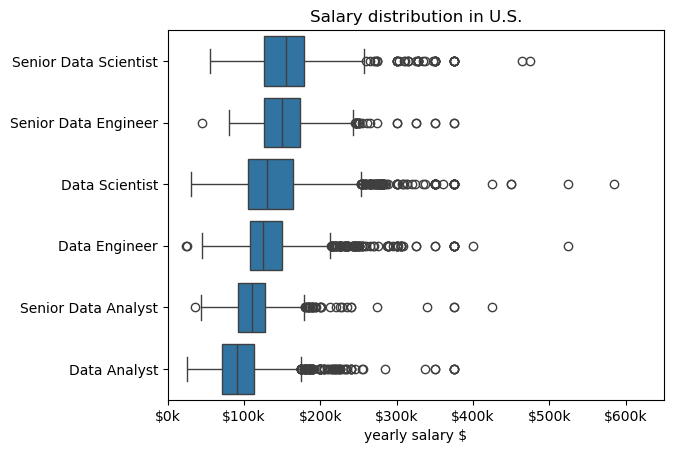

In [26]:
salary_list = [df_us_top6[df_us_top6['job_title_short'] == jt]['salary_year_avg'] for jt in job_titles]

#plt.boxplot(job_list, labels = job_title, vert = False)

sns.boxplot(data = df_us_top6 , x= 'salary_year_avg', y='job_title_short', order= job_order)
plt.title('Salary distribution in U.S.')
plt.xlabel('yearly salary $')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
plt.xlim(0,650000)
plt.show()

## Investigating Median Salary VS Skill for Data Analyst

In [39]:
df_us_da = df_us[(df_us['job_title_short'] == 'Data Analyst') & (df_us['job_country'] == 'United States')].copy()
df_us_da.dropna(subset='salary_year_avg', inplace=True)
df_us_da = df_us_da.explode('job_skills')
df_us_da[['job_skills','salary_year_avg']].head(5)

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0


In [50]:
df_us_top_pay_skill = df_us_da.groupby('job_skills').agg(
    count_of_skill = ('job_skills', 'count'),
    median_sal = ('salary_year_avg','median')           #----------> top pay based on median salary
).sort_values(by='median_sal', ascending= False)

df_us_top_pay_skill = df_us_top_pay_skill.head(10)
df_us_top_pay_skill

,count_of_skill,median_sal
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


In [49]:
df_us_top_skill = df_us_da.groupby('job_skills').agg(
    count_of_skill = ('job_skills', 'count'),
    median_sal = ('salary_year_avg','median')       #----------> top pay based on skill popularity
).sort_values(by='count_of_skill', ascending= False)

df_us_top_skill = df_us_top_skill.head(10)
df_us_top_skill = df_us_top_skill.sort_values(by='median_sal', ascending= False)
df_us_top_skill

,count_of_skill,median_sal
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


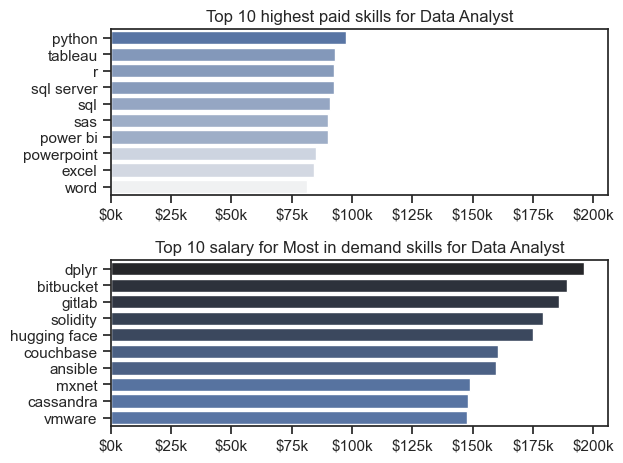

In [54]:
fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_us_top_pay_skill, x= 'median_sal', y=df_us_top_pay_skill.index, ax = ax[1], hue = 'median_sal', palette='dark:b_r')
ax[1].set_title('Top 10 salary for Most in demand skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
ax[1].legend().remove()


sns.barplot(data=df_us_top_skill, x= 'median_sal', y=df_us_top_skill.index, ax = ax[0], hue = 'median_sal', palette='light:b')
ax[0].set_xlim(ax[1].get_xlim())
ax[0].set_title('Top 10 highest paid skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
ax[0].legend().remove()


fig.tight_layout()
plt.show()